Clustering approach on mental health with remote work.


In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv(r'C:\Users\pieta\OneDrive\Bureau\Mental Health Model\Mental_health_model\Data\Impact_of_Remote_Work_on_Mental_Health_cleaned.csv')

In [27]:
data.columns

Index(['Age', 'Gender', 'Job_Role', 'Industry', 'Years_of_Experience',
       'Work_Location', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Work_Life_Balance_Rating', 'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

Non-numeric columns: ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level', 'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region']


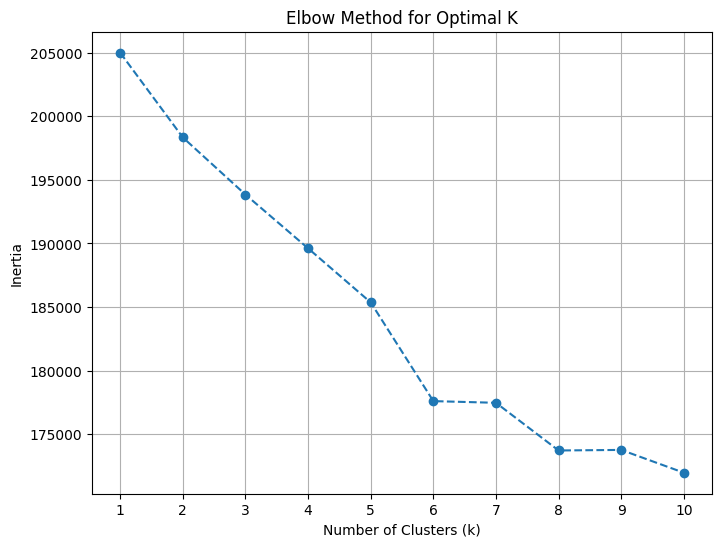

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'data' is your original DataFrame

# Step 1: Loop through the columns and check which ones are non-numeric
non_numerical_cols = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype.name == 'category']
print("Non-numeric columns:", non_numerical_cols)

# Step 2: Use ColumnTransformer for One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), non_numerical_cols),  # One-hot encode categorical columns
    ], remainder='passthrough'  # Leave the rest of the columns unchanged
)

# Step 3: Create a pipeline that applies scaling and clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessor (One-Hot Encoding)
    ('scaler', StandardScaler()),    # Scale the data
])

# Step 4: Apply transformations to the data
data_transformed = pipeline.fit_transform(data)

# Step 5: Calculate inertia for different values of k
inertia = []
k_range = range(1, 11)  # You can try more values for k (e.g., 1 to 10 clusters)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_transformed)
    inertia.append(kmeans.inertia_)

# Step 6: Plot inertia vs. number of clusters (k)
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()



In [35]:
# After determining the optimal k from the elbow method
optimal_k = 3  # Example: Suppose the elbow suggests 3 clusters

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_transformed)

# Assign the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# View the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[ 4.54312623e-04 -1.70043534e-03  1.01797275e-02  2.11893675e-02
  -1.20118261e-02  2.32643578e-02 -1.24320942e-02 -1.35958833e-02
  -7.84825871e-03 -9.29319807e-03  1.52903694e-02 -1.21216773e-02
  -1.42494309e-02  3.54875983e-02 -1.49718745e-02 -2.84210990e-01
   1.78881417e-01 -1.82417707e-02 -2.34086635e-02  3.31443631e-01
  -5.76118587e-01 -8.65269092e-03  3.39984162e-02 -9.97543135e-03
  -7.09760099e-01  5.54116165e-01 -6.04261126e-03 -1.02449196e-02
   4.41270911e-03  1.57079193e-02 -6.47729383e-03  1.65079633e-02
  -3.05156036e-02 -1.20735501e-02  6.05874218e-03 -3.91064080e-02
   9.41163781e-03 -3.87328539e-03  1.88089412e-02  4.78059208e-03
  -1.55782668e-02]
 [ 3.22946530e-02  1.58561319e-02 -5.48061130e-02  8.73635948e-03
   1.50598670e-02 -6.35736236e-02  1.37804334e-02  7.57036407e-03
   3.17548064e-02 -2.20595739e-03 -1.61025911e-02  4.45591161e-02
  -8.79234277e-03 -4.72149297e-02  2.29647325e-02  6.94300427e-03
  -2.38901046e-02  1.03615602e-02  2.226

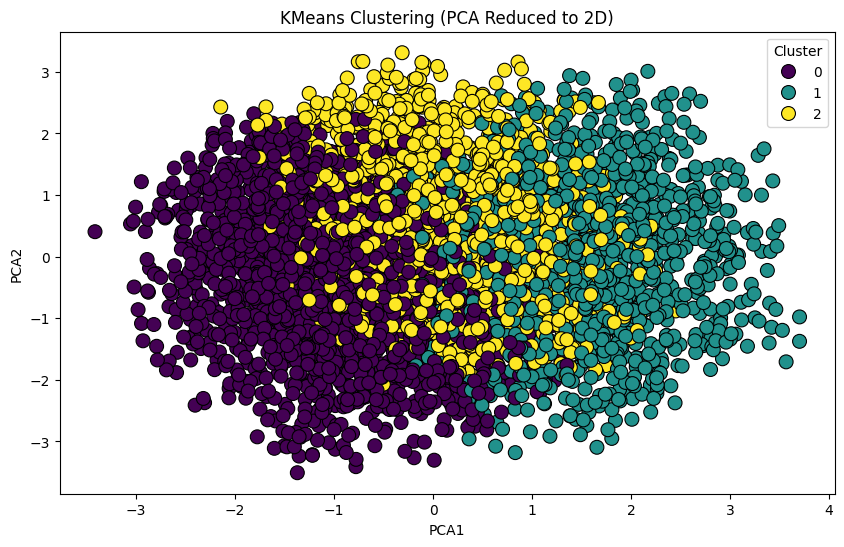

In [36]:
from sklearn.decomposition import PCA
import seaborn as sns

# Assuming you have fitted the KMeans model and have the transformed data
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace with the optimal number of clusters
kmeans.fit(data_transformed)

# Get the cluster labels
labels = kmeans.labels_

# Step 1: Apply PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_transformed)

# Step 2: Create a DataFrame with the 2D PCA components and the labels
df_pca = pd.DataFrame(data_2d, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = labels  # Add the cluster labels

# Step 3: Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='black')
plt.title('KMeans Clustering (PCA Reduced to 2D)')
plt.show()
